# 3. 그래프와 시각화

In [1]:
pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## pandas로 그래프 그리기

- Pandas의 Series와 Dataframe 객체 모두 `plot()` 메서드를 지원
-  `matplotlib.pyplot.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하게 사용 가능

- [pandas.Seris.plot()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
- [pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### 시리즈와 선그래프

- 시리즈는 하나의 선그래프를 그릴 수 있다. 
- 인덱스 : x축 좌표
- value : y축 좌표

In [4]:
s_1 = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))

In [5]:
s_1

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64

<AxesSubplot:>

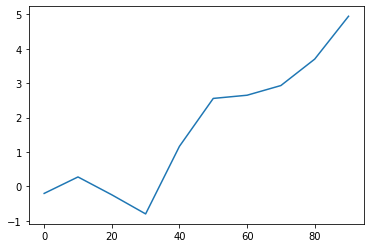

In [6]:
s_1.plot()

### 데이터프레임과 선그래프

- 데이터프레임은 특성 수만큼의 선그래프를 그릴 수 있다.
- y축 좌표는 특성별 value이며, x축 좌표는 기본적으로 index가 사용
- 특성 이름이 범례로 지정

In [7]:
#랜덤 데이터
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df

,A,B,C,D
0,1.007189,-1.296221,0.274992,0.228913
10,2.360106,-0.409792,-1.726646,-0.142930
20,4.029132,-0.848362,-2.266387,0.334055
30,7.278075,-1.869589,-2.843474,0.458177
40,7.580689,-1.345817,-2.842534,1.801986
50,6.867145,-2.176970,-5.212766,-0.058774
60,6.006388,-1.616825,-6.478700,0.061053
70,4.942875,-1.283942,-8.838119,-0.138490
80,3.400880,-2.254678,-10.145149,0.147860
90,3.778864,-3.008565,-9.813864,1.497602


<AxesSubplot:>

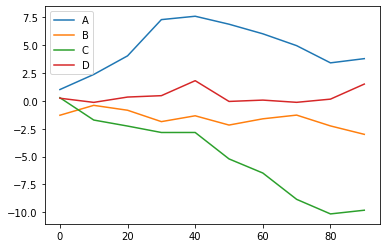

In [8]:
df.plot()

`subplots=True` 
- 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

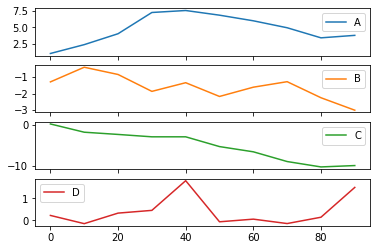

In [9]:
df.plot(subplots = True)

### 시리즈와 막대그래프

- 수직 막대그래프: `pandas.Series.plot.bar()`
- 수평 막대그래프: `pandas.Series.plot.barh()`

- 수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 mapping 된다. 

In [10]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [11]:
data

a    0.929616
b    0.316376
c    0.183919
d    0.204560
e    0.567725
f    0.595545
g    0.964515
h    0.653177
i    0.748907
j    0.653570
k    0.747715
l    0.961307
m    0.008388
n    0.106444
o    0.298704
p    0.656411
dtype: float64

- 서브플롯을 지정
    - `ax=서브플롯` 옵션을 지정
    - 시리즈와 데이터프레임의 모든 그래프 함수에 사용할 수 있다. 

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:>

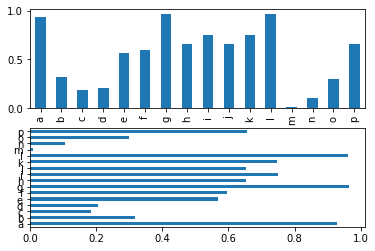

In [16]:
fig,axes = plt.subplots(2,1)  #axes는 array

data.plot.bar(ax =axes[0])
data.plot.barh(ax =axes[1])              

<AxesSubplot:>

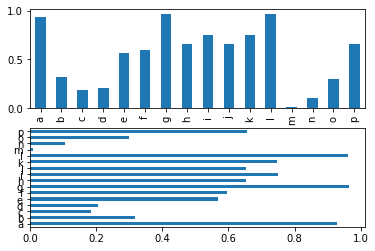

In [17]:
fig, axes = plt.subplots(2,1)

data.plot.bar(ax = axes[0])
data.plot.barh(ax = axes[1])

#### plot() 
- `kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수

<AxesSubplot:>

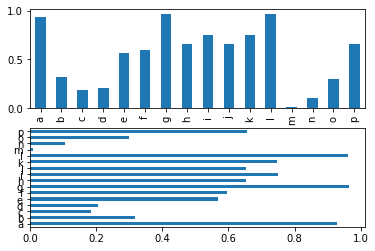

In [18]:
fig, axes = plt.subplots(2,1)

data.plot(ax = axes[0], kind="bar")
data.plot(ax = axes[1], kind="barh")

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pandas.DataFrame.plot.bar()`
- 수평 막대그래프: `pandas.DataFrame.plot.barh()`

수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 주어진 경우 사용된다.
- 행별 막대그래프를 하나로 묶어서 보여준다.

In [19]:
df

,A,B,C,D
0,1.007189,-1.296221,0.274992,0.228913
10,2.360106,-0.409792,-1.726646,-0.142930
20,4.029132,-0.848362,-2.266387,0.334055
30,7.278075,-1.869589,-2.843474,0.458177
40,7.580689,-1.345817,-2.842534,1.801986
50,6.867145,-2.176970,-5.212766,-0.058774
60,6.006388,-1.616825,-6.478700,0.061053
70,4.942875,-1.283942,-8.838119,-0.138490
80,3.400880,-2.254678,-10.145149,0.147860
90,3.778864,-3.008565,-9.813864,1.497602


<AxesSubplot:>

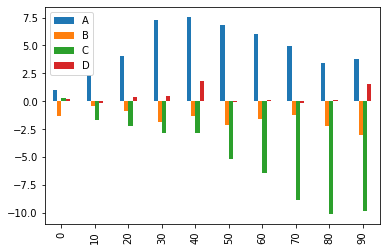

In [21]:
df.plot.bar()

In [22]:
df_1 = pd.DataFrame(np.random.rand(6,4),
                    index = ["one", "two","three","four","five","six"],
                    columns = pd.Index(["A","B","C","D"]))

<AxesSubplot:>

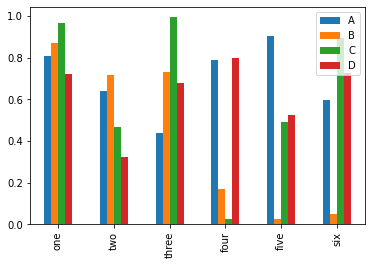

In [24]:
df_1.plot.bar()

<AxesSubplot:>

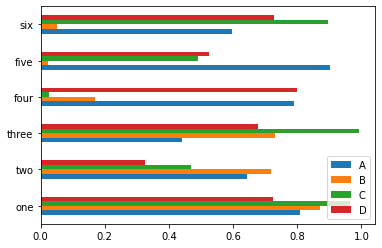

In [25]:
df_1.plot.barh()

#### 누적막대그래프

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적 출력

<AxesSubplot:>

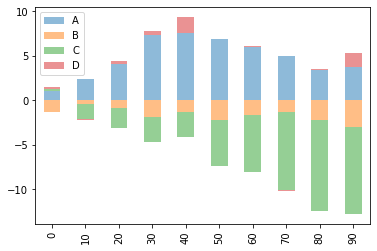

In [29]:
df.plot.bar(stacked = True, alpha = 0.5)

<AxesSubplot:>

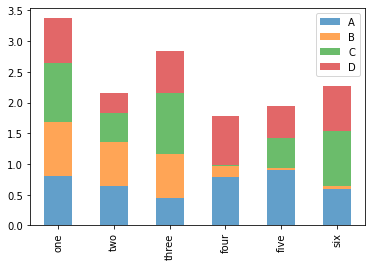

In [28]:
df_1.plot.bar(stacked = True, alpha = 0.7)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일

<AxesSubplot:>

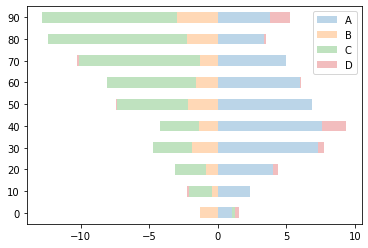

In [32]:
df.plot.barh(stacked = True, alpha = 0.3)

<AxesSubplot:>

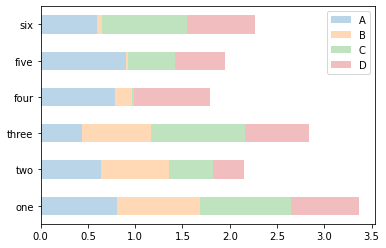

In [31]:
df_1.plot.barh(stacked = True, alpha = 0.3)

<AxesSubplot:>

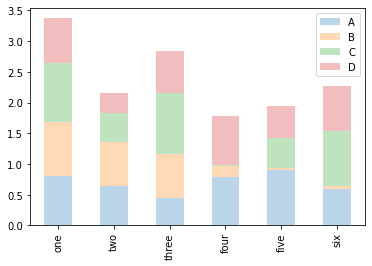

In [34]:
df_1.plot(stacked = True, kind = "bar", alpha = 0.3)

<AxesSubplot:>

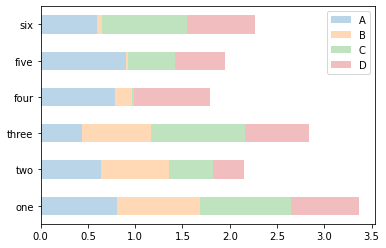

In [35]:
df_1.plot(stacked = True, kind = "barh", alpha = 0.3)

Text(0.5, 1.0, 'chealsea ')

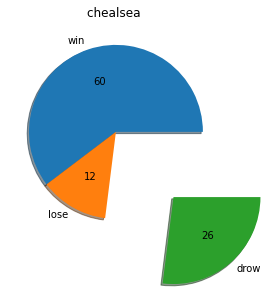

In [55]:
## pi 차트 원 그래프

labels = ["win", "lose", "drow"]
count = [38, 8, 17]
explode=(0,0,1)  #중심에서 벗어나는 정도
plt.pie(count, labels=labels, shadow=True,
        autopct = "%d",
        explode=explode)
plt.title("chealsea ")

Text(0.5, 1.0, 'chealsea ')

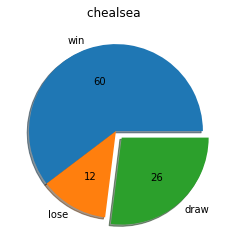

In [49]:
## pi 차트 원그래프

labels = ["win", "lose", "draw"]
count = [38, 8, 17]
explode = (0,0,0.1)

plt.pie(count, labels = labels, shadow = True,
        autopct = "%d",
        explode = explode)
plt.title("chealsea ")

### 예제: 서비스 팁(tip) 데이터

서비스 팁 데이터는 요일별 파티 수, 총 수입, 시간대, 팁 수입 등에 대한 정보를 담고 있다.

__참고:__ 서비스 팁 데이터를 아래처럼 불러올 수도 있다.

```python
import seaborn as sns
tips = sns.load_dataset('tips').drop('sex', axis=1)
```

In [76]:
tips_path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv'

In [77]:
tips = pd.read_csv(tips_path)
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


column별 특성

- `total_bill`: 총 수입
- `tip`: 서비스 팁
- `smoker`: 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 파티 규모(참여인원 수)

범주형 데이터에 사용된 값들은 다음과 같다.

- 흡연 여부

In [64]:
tips["smoker"].unique()
set(tips["smoker"])

{'No', 'Yes'}

* 요일

In [65]:
tips["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 시간대

In [66]:
tips["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

- size 
    - 해당 파티 규모(참여인원 수)
    - 최소 1명 최대 6명이 참여


In [67]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

#### cross table
- 요일과 파티 규모 사이의 관계를 파악하기 위해 교차표(cross table)를 이용
- `pandas.crosstab()` 함수는 지정된 두 특성 사이의 도수분포도를 표로 생성
- [참고](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=niiceha3&logNo=220718992859)

In [79]:
party_counts = pd.crosstab(tips["day"],tips["size"])

In [80]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


- 빈도수가 낮은 1인과 6인 파티는 제외하자.

In [92]:
party_counts = party_counts.loc[:,2:5]   #인덱스가 아닌 column 명으로 찾으니까
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


#### 행별 정규화(Normalization)

- column별 항목의 합이 1이 되도록 값을 정규화한다.
    - 요일별 파티 규모의 비율을 파악할 수 있다.
    - 가장 파티를 많이 하는 요일을 찾을수 있다. 

- `pandas.div()` 함수: 각 항목을 지정된 값으로 나눈다. `axis=0`는 행별로 나눗셈을 실행하도록 지정한다.

In [96]:
party_counts.sum(1)   #정규화 시킨다

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [94]:
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)

<AxesSubplot:xlabel='day'>

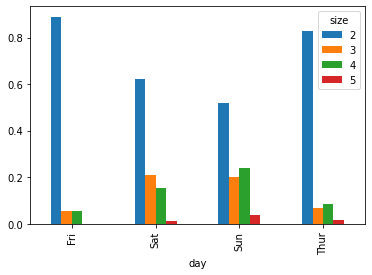

In [95]:
party_pcts.plot.bar()

- 주말일 수록 파티 규모가 커짐을 알수 있다. 

## seanborn으로 그래프 그리기

- seaborn 라이브러리는 matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API(도구)를 제공

In [98]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [100]:
import seaborn as sns

- 'tip_pct' column에 요일별로 총 순수수입에서 서비스 팁이 차지하는 비율을 추가하자
    - 팁 비율: 총 순수수입 $=$ 총 수입 $-$ 팁

In [102]:
tips["tip_pct"] = tips["tip"]/(tips["total_bill"]-tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


#### `seaborn.barplot()` 함수

- 요일별 서비스 팁의 비율의 평균값(mean)
    - 막대 끝에 위치한 검정 직선 기본적으로 신뢰도 95%의 신뢰구간을 표시하는 __오차 막대__(error bar)이다.
    - 95%의 신뢰도 다음 범주에 데이터가 존재 한다.

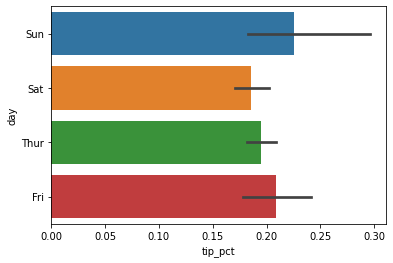

In [104]:
sns.barplot(x = "tip_pct", y = "day", data = tips)
plt.show()

- `ci` 옵션을 조절하면 신뢰구간을 다음과 같이 변경 가능
    - `ci='sd'` 옵션: 신뢰 구간 대신에 표준 편차(standard deviation) 표시.
    - `ci=None` 옵션: 검정 막대 표시하지 않음.

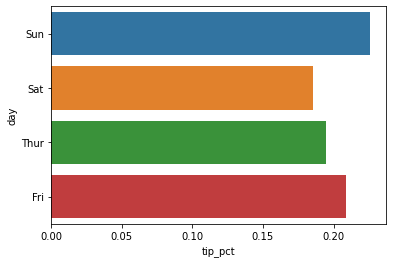

In [105]:
sns.barplot(x = "tip_pct", y = "day", data = tips, ci = None)
plt.show()

* `hue='time'`: time column을 추가 기준으로 사용하면 다음 결과가 보인다.

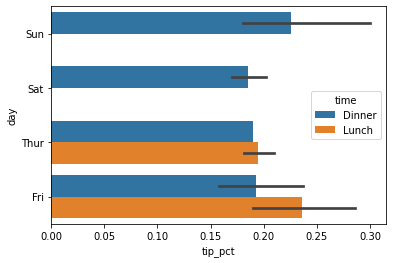

In [107]:
sns.barplot(x = "tip_pct", y = "day", hue = "time", data = tips)
plt.show()

__참고:__ 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문

### seaborn 기본 설정

`seaborn.set_theme()` 함수를 이용하여 다양한 설정을 지정가능

```python
seaborn.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep', 
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)
```

sns.set_theme(style="darkgrid")
# style의 종류는?

지정된 설정은 모든 그래프에 영향을 준다.

### 히스토그램과 밀도그래프`

- 아래 pandas의 `plot()` 함수를 이용하여 히스토그램을 그리는 것을 보여준다.
- 사용되는 date는 요일별 팁의 비율이다. (최고 2.5% )

<AxesSubplot:ylabel='Density'>

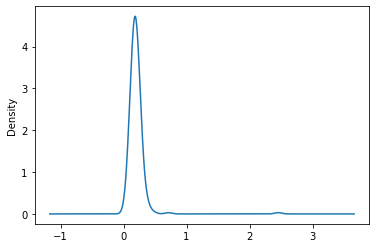

In [109]:
tips["tip_pct"].plot.density()

- `pandas.plot.density()` 함수는 히스토그램에 대한 추정 연속확률밀도 함수의 그래프를 그린다.

- seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.
    - `seaborn.histplot()` 또는 `seaborn.displot()` 함수를 `kde=True` (커널 밀도 추정) 옵션과 함께 사용가능

#### `seaborn.histplot()` 함수

In [110]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

<AxesSubplot:ylabel='Count'>

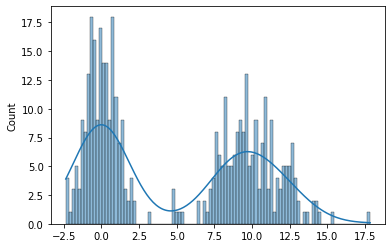

In [112]:
sns.histplot(values, bins = 100, kde=True)

#### `seaborn.displot()` 함수

`seaborn.displot()` 사용할 경우 사이즈와 가로세로의 기본 비율이 다르다.

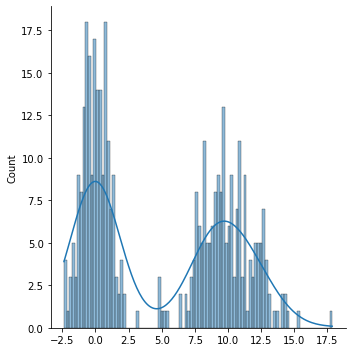

In [113]:
sns.displot(values, bins = 100, kde=True)

하지만 `height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

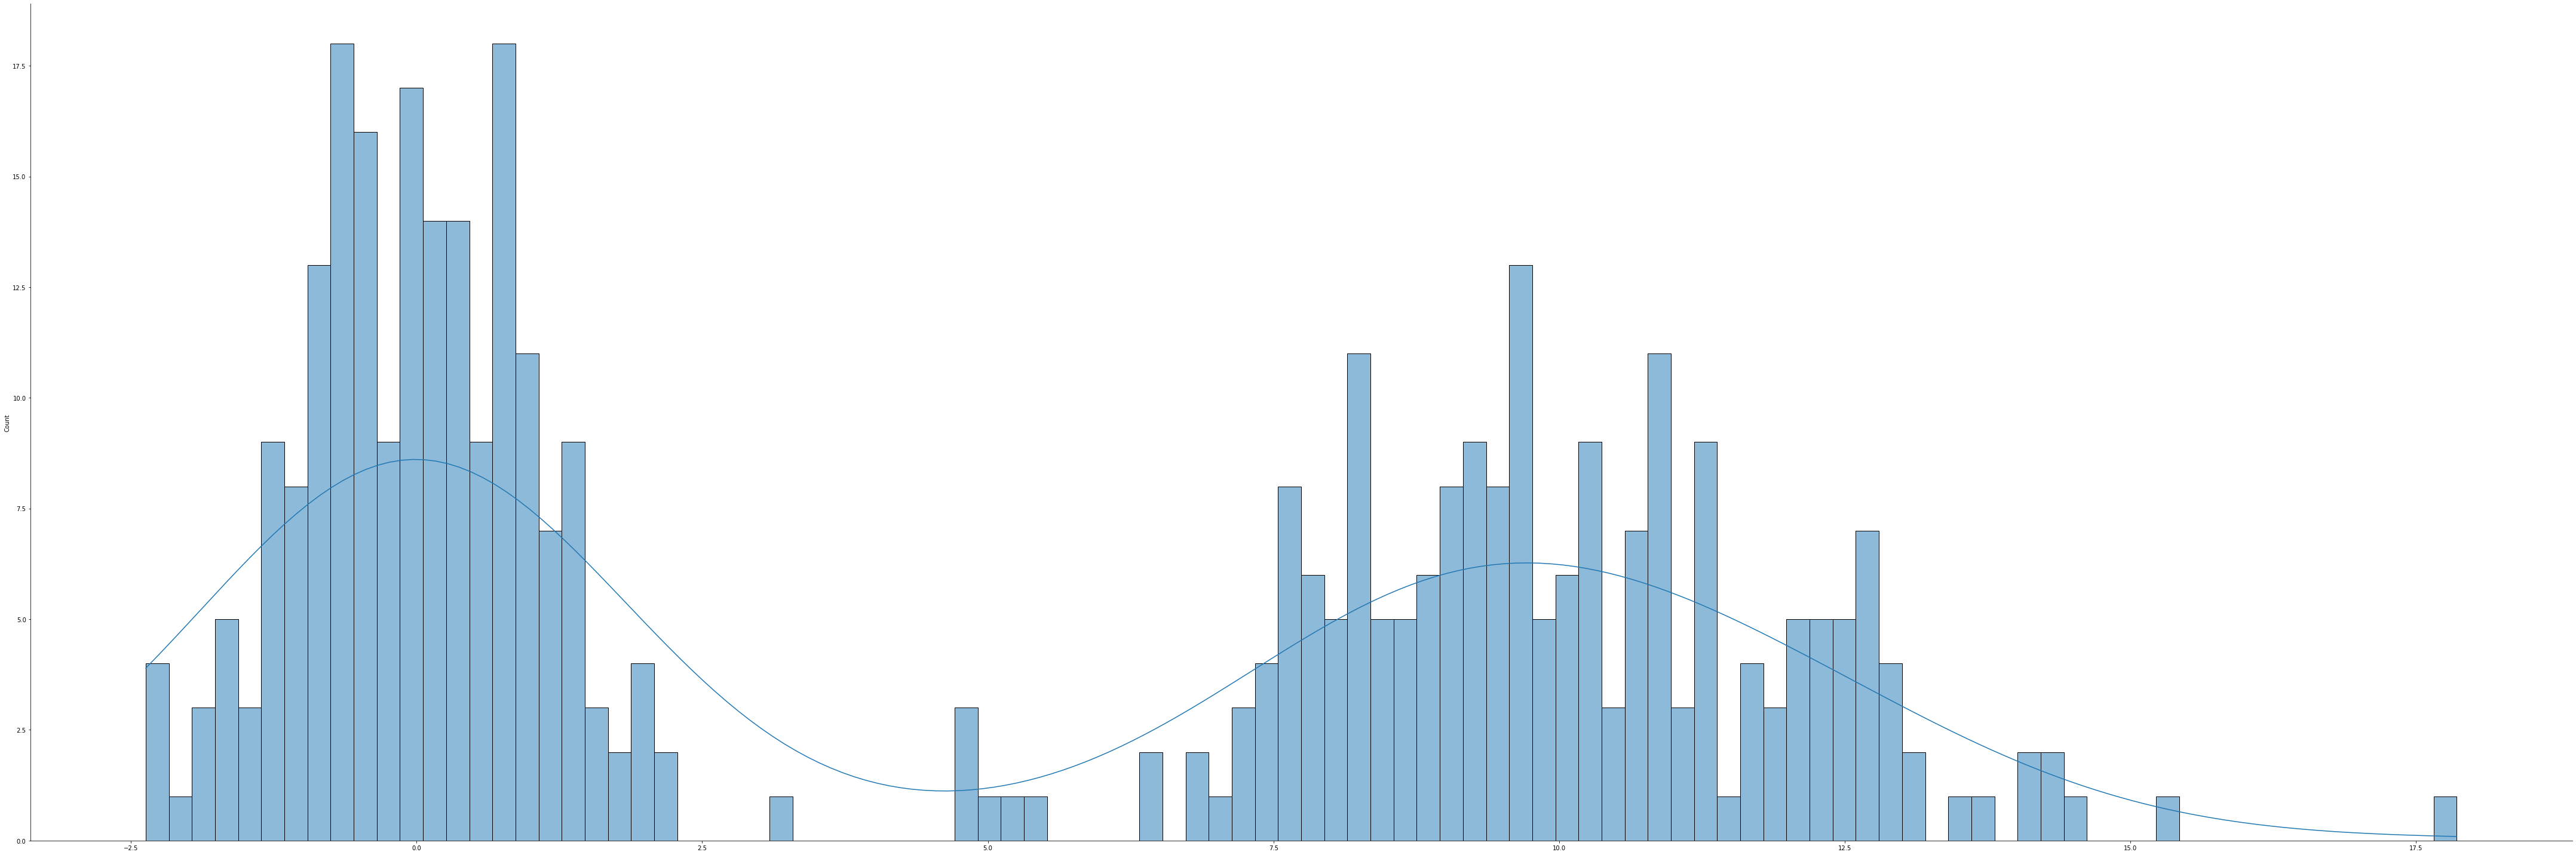

In [117]:
sns.displot(values, bins = 100, kde=True, height = 20, aspect = 3)

#### 예제: 서비스 팁 비율의 히스토그램과 밀도 그래프

In [118]:
data = tips['tip_pct']

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

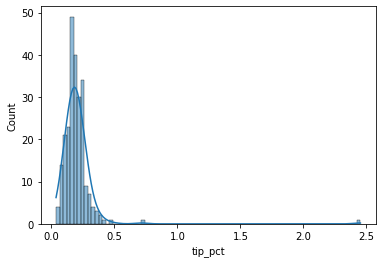

In [119]:
sns.histplot(data, kde = True)

### 산점도
- `statsmodels` 모듈에서 불러온다.

- 1959년부터 2009년까지 미국의 거시경제지표 데이터 사용

In [11]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 32.3 MB/s eta 0:00:00
     --------------------------------------- 36.9/36.9 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 233.7/233.7 kB 14.9 MB/s eta 0:00:00


In [120]:
import statsmodels.api as sm

macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 | 
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 | 
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

이중에 네 개의 지표만 이용해서 산점도를 설명한다.

- cpi: 분기별 소비자 물가지수
- m1: M1 통화지수
- tbilrate: 3개월 만기 국채 수익률
- unemp: 실업률

In [121]:
data = macro[["cpi","m1","tbilrate","unemp"]]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


시간의 흐름에 따른 변화량
- 사용된 데이터의 척도(scale)을 맞추기 위해 로그값을 취한 후 분기별 변화량을 측정
- `np.log()` 함수: 어레이/데이터프레임의 항목별로 적용되는 유니버설 함수
- `diff()` 메서드: 열별로 이전 행의 항목값과의 차이를 계산함. 
    0번 행이거나 결측치가 사용되었을 경우 결측치로 처리됨.
    `axis=1`로 지정하면 열별 차이를 계산함.
- `dropna()` 메서드: 결측치가 포함된 행 삭제.
    `axis=1`로 지정하면 결측치가 포함된 열 삭제.
    


In [122]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


#### 산점도와 선형회귀 곡선
- `seaborn.regplot()` 함수는 산점도와 두 데이터 사이의 선형 관계를 보여주는 선형회귀 곡선을 동시에 그린다.

```python
seaborn.regplot(x='m1', y='unemp', data=trans_data)
```

<AxesSubplot:xlabel='m1', ylabel='unemp'>

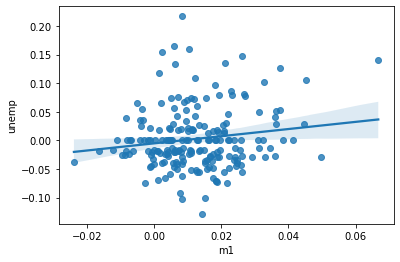

In [123]:
sns.regplot(x = "m1", y = "unemp", data = trans_data)

<AxesSubplot:xlabel='m1', ylabel='m1'>

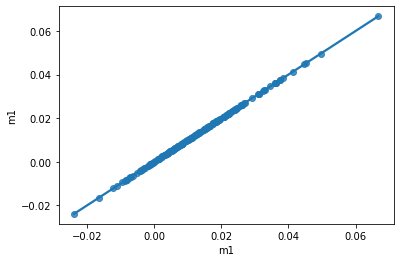

In [124]:
sns.regplot(x = "m1", y = "m1", data = trans_data)

<AxesSubplot:xlabel='unemp', ylabel='cpi'>

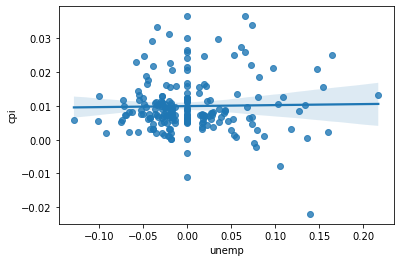

In [125]:
sns.regplot(x = "unemp", y = "cpi", data = trans_data)

- `m1` 데이터와 `unemp` 데이터 사이의 선형관계가 많이 있어보이지는 않는다. 
- 실제로 두 특성 사이의 상관계수르 확인해 보자

In [127]:
corr = trans_data.corr()

`seaborn.heatmap()` 함수를 이용하여 선형관계를 색으로 표현가능

<AxesSubplot:>

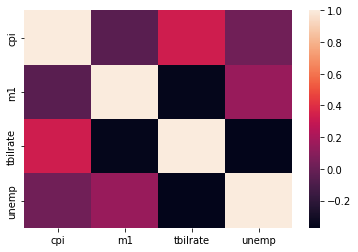

In [130]:
sns.heatmap(corr)

__참고:__ 선형회귀 직선을 보이지 않으려면 `fit_reg=False` 옵션을 사용한다.

<AxesSubplot:xlabel='m1', ylabel='unemp'>

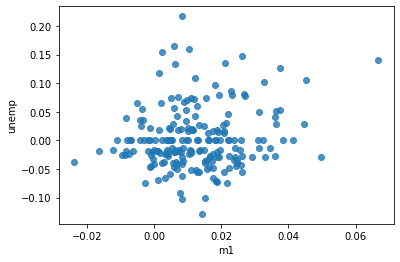

In [131]:
sns.regplot(x = "m1", y = "unemp", data = trans_data, fit_reg = False)

`seaborn.regplot()` 
- [참고](https://seaborn.pydata.org/generated/seaborn.regplot.html)

#### 산점도 행렬

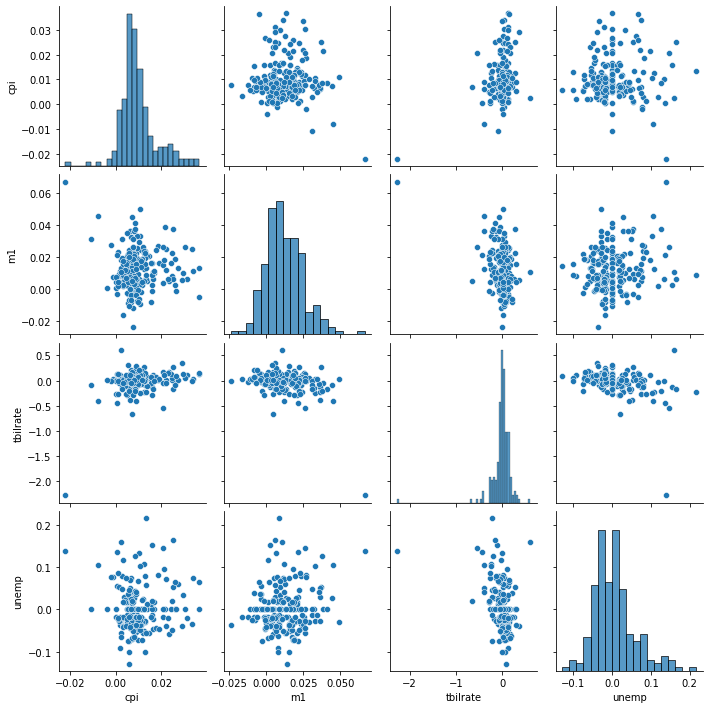

In [132]:
sns.pairplot(trans_data)

`diag_kind=kde` 옵션을 사용하면 대각선 상에 히스토그램 대신 밀도그래프가 삽입된다.

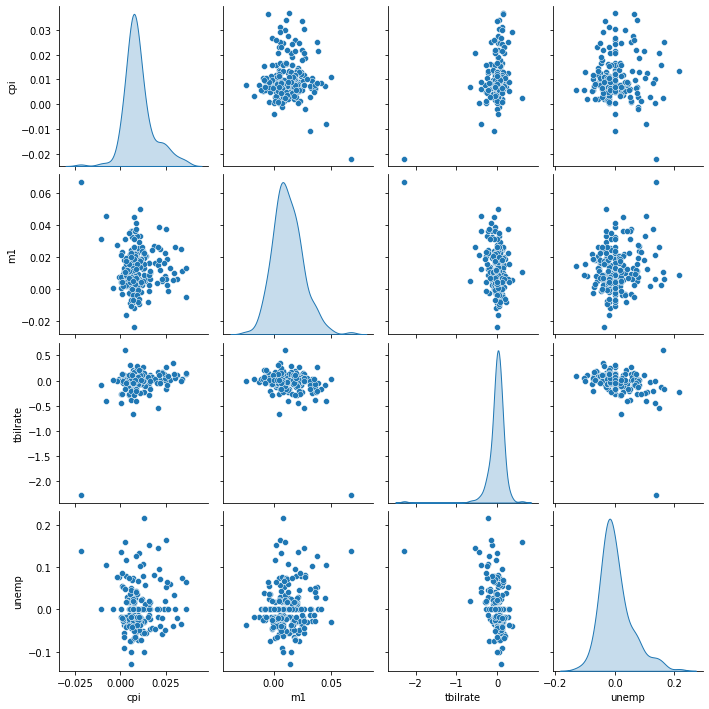

In [134]:
sns.pairplot(trans_data, diag_kind = 'kde')

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. 필요한 라이브러리를 import 하세요

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. 다음주소로 부터 데이터셋을 다운로드 받으세요 [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. tips 이라는 변수에 데이터 프레임을 할당하세요

In [148]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [150]:
tips.dtypes

Unnamed: 0      int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### Step 4. `Unnamed: 0` 을 삭제하세요 

In [151]:
del tips['Unnamed: 0']
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. total_bill column을 histogram으로 생성하세요

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

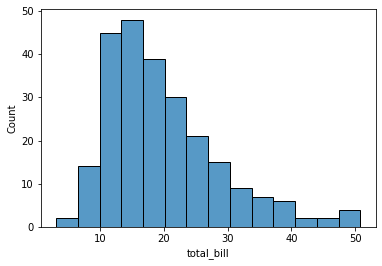

In [157]:
sns.histplot(tips["total_bill"])

C:\Users\haekyu\anaconda3\envs\week1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


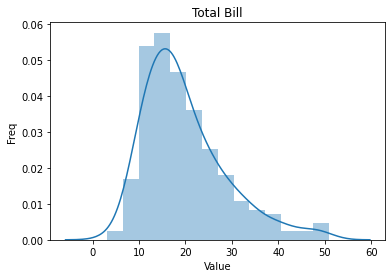

In [236]:
total_bill =sns.distplot(tips. total_bill)
total_bill.set(xlabel = "Value", ylabel = "Freq", title= "Total Bill")
plt.show()

### Step 6. total_bill과 tip 사이의 관계를 나타내는 산점도를 만드세요
#### hint : jointplot 을 생성하세요

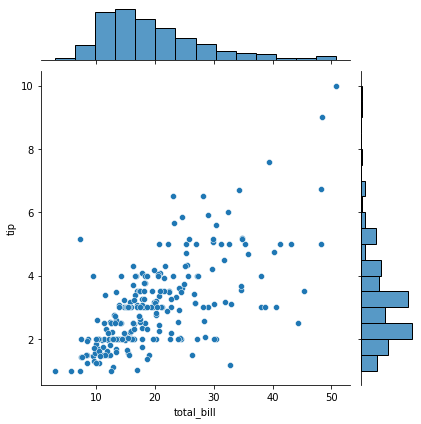

In [156]:
sns.jointplot(x = 'total_bill', y = 'tip' , data = tips)

### Step 7. total_bill, tip, size의 관계를 3x3 이미지로 생성하세요

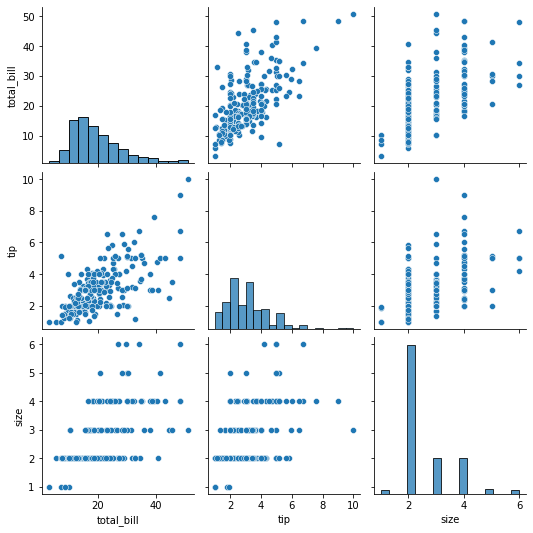

In [162]:
sns.pairplot(tips[['total_bill','tip','size']])

### Step 8. days and total_bill 의 관계를 stripplot 으로 생성해 보세요

<AxesSubplot:xlabel='day', ylabel='total_bill'>

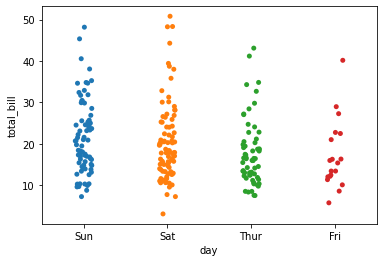

In [163]:
sns.stripplot( x = 'day', y = 'total_bill', data = tips)

### Step 9. day를 y축으로, tip을 x축으로 하여 산점도를 만들고 scatter는 성별로 구분하세요

<AxesSubplot:xlabel='tip', ylabel='day'>

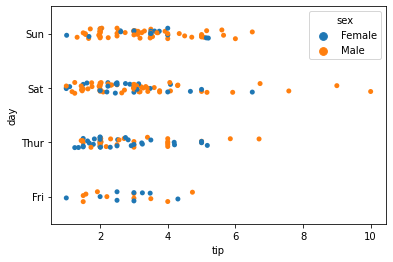

In [237]:
sns.stripplot(x = 'tip', y = 'day', hue = 'sex',  data = tips)

### Step 10. 날짜별 total_bill의 차이를 box plot 으로 만드세요 (Dinner or Lunch를 구분하여 만드세요)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

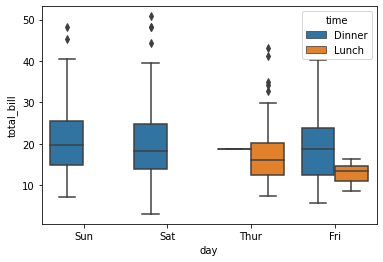

In [168]:
sns.boxplot(x = 'day', y ='total_bill' ,hue = 'time', data = tips)

### Step 11. Dinner and Lunch 시간의 Tip 분포를 히스토 그램으로 만드세요. 

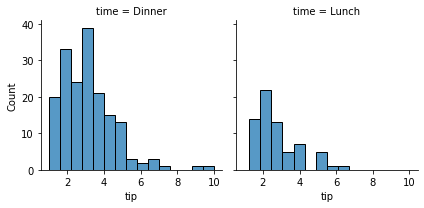

In [245]:
grid = sns.FacetGrid(tips, col = 'time')
grid.map(sns.histplot, 'tip')

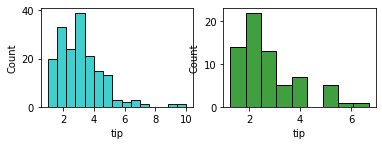

In [238]:
data_1=tips[tips['time']=='Dinner']
data_2=tips[tips['time']=='Lunch']
            

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1 =sns.histplot(data_1['tip'], color = 'c')

ax2 = fig.add_subplot(2,2,2)
ax2 =sns.histplot(data_2['tip'], color = 'g')


### Step 12. 흡연자 또는 비흡연자에 따라 다른 total_bill 값과 팁 관계를 하나는 남성, 하나는 여성에 대한 두개의 산점도를 생성하세요

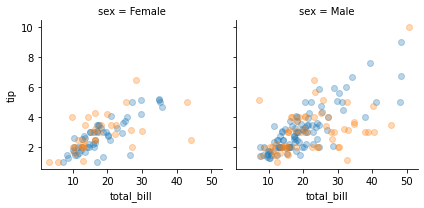

In [255]:
grid = sns.FacetGrid(tips, col = "sex", hue="smoker")   #성별로 먼저 분류 한다 ,거기에 hue로 분류한다
grid.map(plt.scatter,"total_bill" ,"tip", alpha = 0.3)

(0.0, 20.0, 0.0, 10.0)

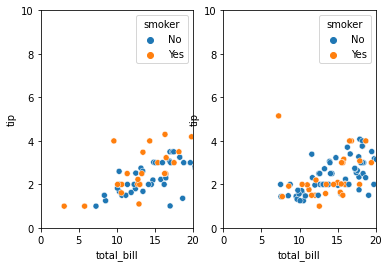

In [254]:
fig = plt.figure()
ax_1 = fig.add_subplot(1,2,1)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips.set_index('sex').loc["Female"])
plt.axis([0,20,0,10])
ax_2 = fig.add_subplot(1,2,2)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips.set_index('sex').loc["Male"])
plt.axis([0,20,0,10])